In [1]:
import pandas as pd
from scipy.stats import gaussian_kde
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import geopandas as gpd
from tqdm import tqdm
from shapely.geometry import Point
from statistics import mode

In [2]:
acc_943 = pd.DataFrame()
for i in range(1,8):
    acc_tmp = pd.read_csv('~/PhD/P50/Data/testData/Acc/943_Act' + str(i) + '.csv')
    acc_tmp = acc_tmp.dropna()
    acc_943 = pd.concat([acc_943,acc_tmp], ignore_index= True)
acc_943 = acc_943.drop('Hour', axis = 1)
acc_943.tail()

,GMT Time,X,Y,Z,Temperature [C]
6890634,6/11/2023 20:56,25.0,17.0,18.0,22.5
6890635,6/11/2023 20:56,25.0,17.0,18.0,22.5
6890636,6/11/2023 20:56,24.0,17.0,18.0,22.5
6890637,6/11/2023 20:56,24.0,17.0,18.0,22.5
6890638,6/11/2023 20:56,25.0,17.0,18.0,22.5


In [3]:
xyz = np.vstack([acc_943['X'], acc_943['Y'], acc_943['Z']]).T

/home/dawnmoon/miniconda3/envs/ses/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


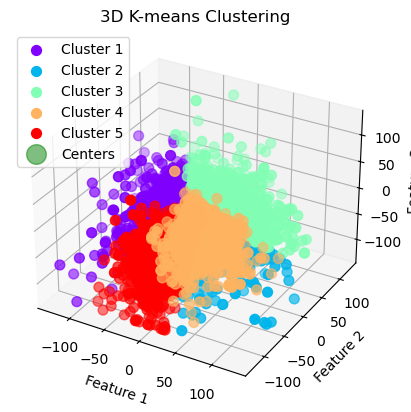

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
n_clusters = 5
kmeans = KMeans(n_clusters, random_state=0)
labels = kmeans.fit(xyz)
colors = plt.cm.rainbow(np.linspace(0, 1, n_clusters))
for i in range(n_clusters):
    ax.scatter(xyz[kmeans.labels_ == i, 0], xyz[kmeans.labels_ == i, 1], xyz[kmeans.labels_ == i, 2], 
               color=colors[i], s=50, label=f'Cluster {i+1}')

# Plot cluster centers
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], 
           c='green', s=200, alpha=0.5, label='Centers')

# Add labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('3D K-means Clustering')

# Legend
ax.legend()

# Show plot
plt.show()

In [5]:
acc_943['K_means'] = kmeans.labels_
acc_943.head()

,GMT Time,X,Y,Z,Temperature [C],K_means
0,10/15/2022 14:44,7.0,-16.0,34.0,14.5,2
1,10/15/2022 14:44,25.0,-5.0,27.0,14.5,2
2,10/15/2022 14:44,20.0,-10.0,32.0,14.5,2
3,10/15/2022 14:44,-9.0,19.0,27.0,14.5,2
4,10/15/2022 14:45,-19.0,-19.0,20.0,14.5,0


In [14]:
acc_943_dif = acc_943[['X','Y','Z']].diff()
acc_943_dif = acc_943_dif.dropna()
acc_943_dif.head()

,X,Y,Z
1,18.0,11.0,-7.0
2,-5.0,-5.0,5.0
3,-29.0,29.0,-5.0
4,-10.0,-38.0,-7.0
5,4.0,13.0,3.0


In [15]:
xyz = np.vstack([acc_943_dif['X'], acc_943_dif['Y'], acc_943_dif['Z']]).T

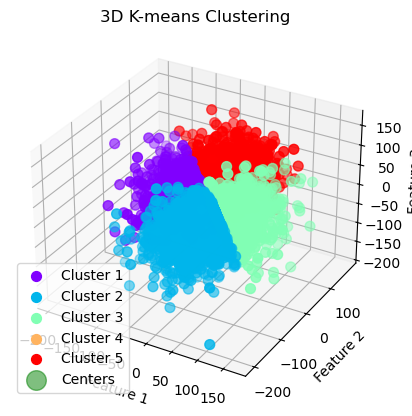

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
n_clusters = 5
kmeans = KMeans(n_clusters, random_state=0)
labels = kmeans.fit(xyz)
colors = plt.cm.rainbow(np.linspace(0, 1, n_clusters))
for i in range(n_clusters):
    ax.scatter(xyz[kmeans.labels_ == i, 0], xyz[kmeans.labels_ == i, 1], xyz[kmeans.labels_ == i, 2], 
               color=colors[i], s=50, label=f'Cluster {i+1}')

# Plot cluster centers
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], 
           c='green', s=200, alpha=0.5, label='Centers')

# Add labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('3D K-means Clustering')

# Legend
ax.legend()

# Show plot
plt.show()

In [29]:
acc_943.shape, kmeans.labels_.shape

((6890639, 5), (6890638,))

In [17]:
acc_943.loc[1:,'K_means_del'] = kmeans.labels_
acc_943.head()

,GMT Time,X,Y,Z,Temperature [C],K_means,K_means_del
0,2022-10-15 14:44:00,7.0,-16.0,34.0,14.5,2,NaN
1,2022-10-15 14:44:00,25.0,-5.0,27.0,14.5,2,2.0
2,2022-10-15 14:44:00,20.0,-10.0,32.0,14.5,2,3.0
3,2022-10-15 14:44:00,-9.0,19.0,27.0,14.5,2,0.0
4,2022-10-15 14:45:00,-19.0,-19.0,20.0,14.5,0,1.0


In [18]:
gps_943 = pd.read_csv('~/PhD/P50/Data/testData/GPS/excel/943_df.csv')
gps_943 = gps_943[['FID','Time','Lat','Lon','No']]
gps_943.tail()

,FID,Time,Lat,Lon,No
17351,20183,2023-06-11 18:20:00,36.187160,-109.906135,21292
17352,20184,2023-06-11 18:30:00,36.187088,-109.906106,21293
17353,20185,2023-06-11 18:40:00,36.187239,-109.906147,21294
17354,20186,2023-06-11 18:50:00,36.187094,-109.906072,21295
17355,20187,2023-06-11 19:00:00,36.186999,-109.905968,21296


In [19]:
acc_943['GMT Time'] = pd.to_datetime(acc_943['GMT Time'], format='%m/%d/%Y %H:%M')
gps_943['Time'] = pd.to_datetime(gps_943['Time'], format='%Y-%m-%d %H:%M:%S')

In [20]:
gps_943_aug = pd.DataFrame()
row = []
n = 0
for i in tqdm(gps_943.index[:-1]):
    row.append(gps_943.loc[[i]])
    cur_row = gps_943.loc[[i]]
    nxt_row = gps_943.loc[[i+1]]
    dt = (nxt_row['Time'][i+1] - cur_row['Time'][i])/10
    dLat = (nxt_row['Lat'][i+1] - cur_row['Lat'][i])/10
    dLon = (nxt_row['Lon'][i+1] - cur_row['Lon'][i])/10
    for j in range(9):
        tmp_row = gps_943.loc[[i]].copy()
        tmp_row['Time'] = (j+1)*dt +  cur_row['Time'][i]
        tmp_row['Lat'] = (j+1)*dLat +  cur_row['Lat'][i]
        tmp_row['Lon'] = (j+1)*dLon +  cur_row['Lon'][i]
        tmp_row['No'] = (j+1)*0.01 +  cur_row['No'][i]
        row.append(tmp_row)
    
gps_943_aug = pd.concat(row)
gps_943_aug

100%|██████████| 17355/17355 [01:28<00:00, 196.07it/s]


,FID,Time,Lat,Lon,No
0,0,2022-10-15 15:30:00,36.188406,-109.904663,4.00
0,0,2022-10-15 15:31:00,36.188649,-109.904862,4.01
0,0,2022-10-15 15:32:00,36.188891,-109.905062,4.02
0,0,2022-10-15 15:33:00,36.189134,-109.905261,4.03
0,0,2022-10-15 15:34:00,36.189376,-109.905461,4.04
...,...,...,...,...,...
17354,20186,2023-06-11 18:55:00,36.187047,-109.906020,21295.05
17354,20186,2023-06-11 18:56:00,36.187037,-109.906010,21295.06
17354,20186,2023-06-11 18:57:00,36.187027,-109.906000,21295.07
17354,20186,2023-06-11 18:58:00,36.187018,-109.905989,21295.08


In [21]:
gps_943_aug.index = range(gps_943_aug.shape[0])
gps_943_aug

,FID,Time,Lat,Lon,No
0,0,2022-10-15 15:30:00,36.188406,-109.904663,4.00
1,0,2022-10-15 15:31:00,36.188649,-109.904862,4.01
2,0,2022-10-15 15:32:00,36.188891,-109.905062,4.02
3,0,2022-10-15 15:33:00,36.189134,-109.905261,4.03
4,0,2022-10-15 15:34:00,36.189376,-109.905461,4.04
...,...,...,...,...,...
173545,20186,2023-06-11 18:55:00,36.187047,-109.906020,21295.05
173546,20186,2023-06-11 18:56:00,36.187037,-109.906010,21295.06
173547,20186,2023-06-11 18:57:00,36.187027,-109.906000,21295.07
173548,20186,2023-06-11 18:58:00,36.187018,-109.905989,21295.08


In [22]:
n = 0
k_class = []
for i in tqdm(acc_943.index):
    if acc_943.loc[i,'GMT Time'] < gps_943_aug.loc[0,'Time']:
        continue
    if acc_943.loc[i,'GMT Time'] < gps_943_aug.loc[n + 1,'Time']:
        k_class.append(acc_943.loc[i,'K_means'])
    else:
        tmp_class = mode(k_class)
        gps_943_aug.loc[n,'KClass'] = tmp_class
        k_class = []
        k_class.append(acc_943.loc[i,'K_means'])
        n = n + 1

100%|█████████▉| 6888285/6890639 [03:59<00:00, 28790.05it/s]


KeyError: 173550

In [12]:
gps_943_aug

,FID,Time,Lat,Lon,No,KClass
0,0,2022-10-15 15:30:00,36.188406,-109.904663,4.00,0.0
1,0,2022-10-15 15:31:00,36.188649,-109.904862,4.01,0.0
2,0,2022-10-15 15:32:00,36.188891,-109.905062,4.02,0.0
3,0,2022-10-15 15:33:00,36.189134,-109.905261,4.03,1.0
4,0,2022-10-15 15:34:00,36.189376,-109.905461,4.04,1.0
...,...,...,...,...,...,...
173545,20186,2023-06-11 18:55:00,36.187047,-109.906020,21295.05,2.0
173546,20186,2023-06-11 18:56:00,36.187037,-109.906010,21295.06,2.0
173547,20186,2023-06-11 18:57:00,36.187027,-109.906000,21295.07,2.0
173548,20186,2023-06-11 18:58:00,36.187018,-109.905989,21295.08,2.0


In [23]:
geometry = [Point(xy) for xy in zip(gps_943_aug.Lon, gps_943_aug.Lat)]
crs = {'init': 'EPSG:4326'} #http://www.spatialreference.org/ref/epsg/2263/  WGS 84
geo_df = gpd.GeoDataFrame(gps_943_aug, crs=crs, geometry=geometry)
geo_df['Time'] = geo_df['Time'].astype(str)
geo_df.to_file(driver='ESRI Shapefile', filename='~/PhD/P50/Data/testData/GPS/Shp/943_Aug_1.shp')

/home/dawnmoon/miniconda3/envs/ses/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
